In [5]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [6]:
#Load dataset
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
1,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
2,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
3,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
4,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


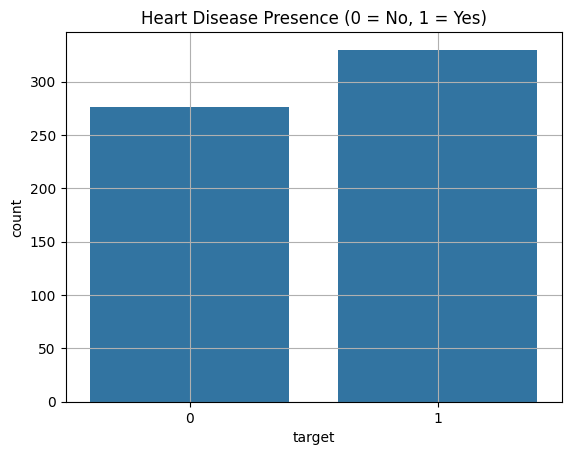

In [7]:
#Target distribution
sns.countplot(x="target", data=df)
plt.title("Heart Disease Presence (0 = No, 1 = Yes)")
plt.grid(True)
plt.show()

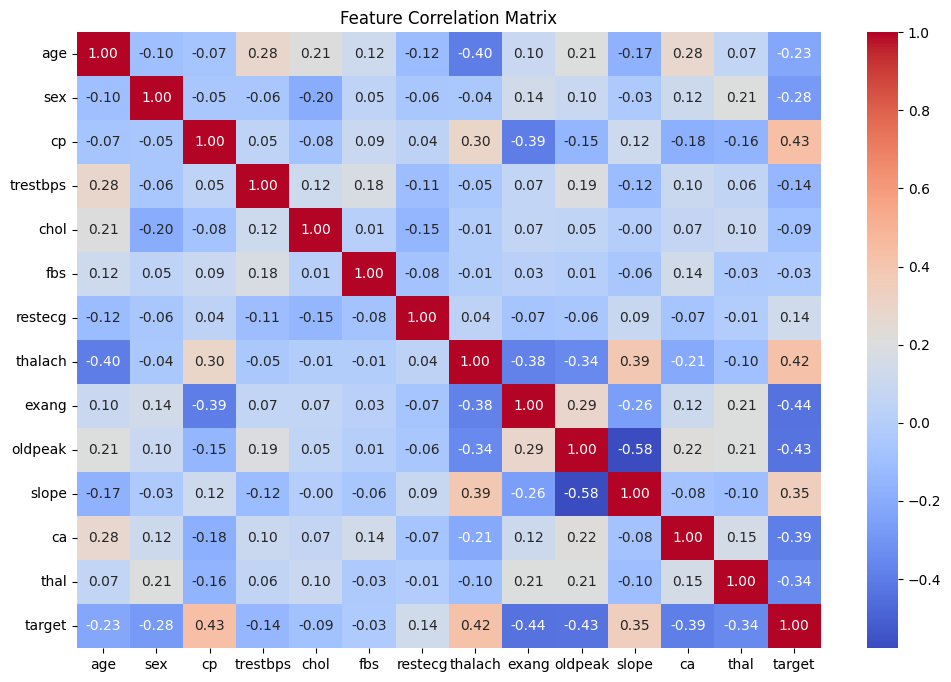

In [8]:
#Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [9]:
#Split features and target
X = df.drop("target", axis=1)
y = df["target"]

In [10]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
#Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [12]:
#Test predictions
y_pred = model.predict(X_test)

#Evaluation results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8278688524590164

Confusion Matrix:
 [[36 14]
 [ 7 65]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.72      0.77        50
           1       0.82      0.90      0.86        72

    accuracy                           0.83       122
   macro avg       0.83      0.81      0.82       122
weighted avg       0.83      0.83      0.83       122



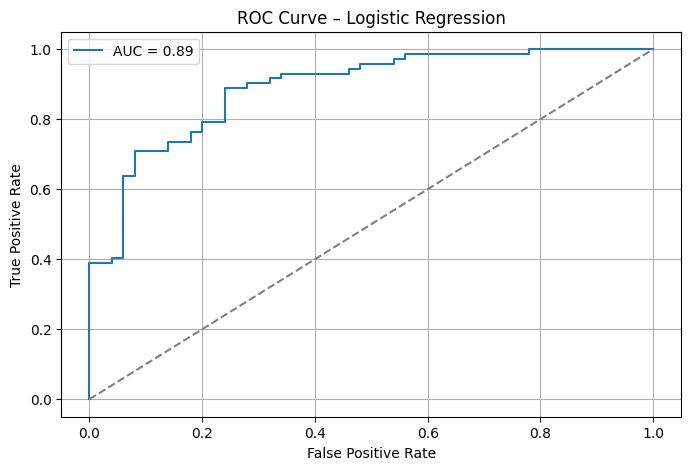

In [13]:
#ROC curve
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
#Sample patient data
sample_patient = {
    "age": 52,
    "sex": 1,
    "cp": 3,
    "trestbps": 130,
    "chol": 250,
    "fbs": 0,
    "restecg": 1,
    "thalach": 160,
    "exang": 0,
    "oldpeak": 1.5,
    "slope": 2,
    "ca": 0,
    "thal": 2
}

#Prepare input for prediction
user_df = pd.DataFrame([sample_patient])

#Prediction
prediction = model.predict(user_df)

#Display result
if prediction[0] == 1:
    print("\nResult: Heart Disease.")
else:
    print("\nResult: No Heart Disease.")


Result: Heart Disease.
